<a href="https://colab.research.google.com/github/CHGROSJEAN/2024_MLEES/blob/main/Projet/Projet_Charlotte_Grosjean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomalie Detection

Import libraries

In [13]:
# Import
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
from shapely.geometry import Point


In [14]:
# Reading the Excel files
grandvennes = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/GrandVennes.xlsx")
riandpre = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/RiandPre.xlsx")

# Displaying the first few rows of each dataset
print("Data from file1:")
print(grandvennes.head())

print("\nData from file2:")
print(riandpre.head())

Data from file1:
   Index             DateTime  Precipitation
0      1  07.01.2023 08:27:54              0
1      2  07.01.2023 08:30:54              0
2      3  07.01.2023 08:33:54              0
3      4  07.01.2023 08:36:54              0
4      5  07.01.2023 08:39:54              0

Data from file2:
   Index             DateTime  Precipitation
0      1  09.11.2022 00:03:39              0
1      2  09.11.2022 00:06:39              0
2      3  09.11.2022 00:09:39              0
3      4  09.11.2022 00:12:39              0
4      5  09.11.2022 00:15:39              0


In [16]:
# Ensuring the 'DateTime' column is of datetime type for both datasets
grandvennes['DateTime'] = pd.to_datetime(grandvennes['DateTime'], dayfirst=True)
riandpre['DateTime'] = pd.to_datetime(riandpre['DateTime'], dayfirst=True)

# Setting the DateTime column as the index for easier time-based operations
grandvennes.set_index('DateTime', inplace=True)
riandpre.set_index('DateTime', inplace=True)

<ipython-input-17-ea02a9a862d2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grandvennes_filtered['Precipitation_mm'] = grandvennes_filtered['Precipitation'] * 0.01
<ipython-input-17-ea02a9a862d2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riandpre_filtered['Precipitation_mm'] = riandpre_filtered['Precipitation'] * 0.01


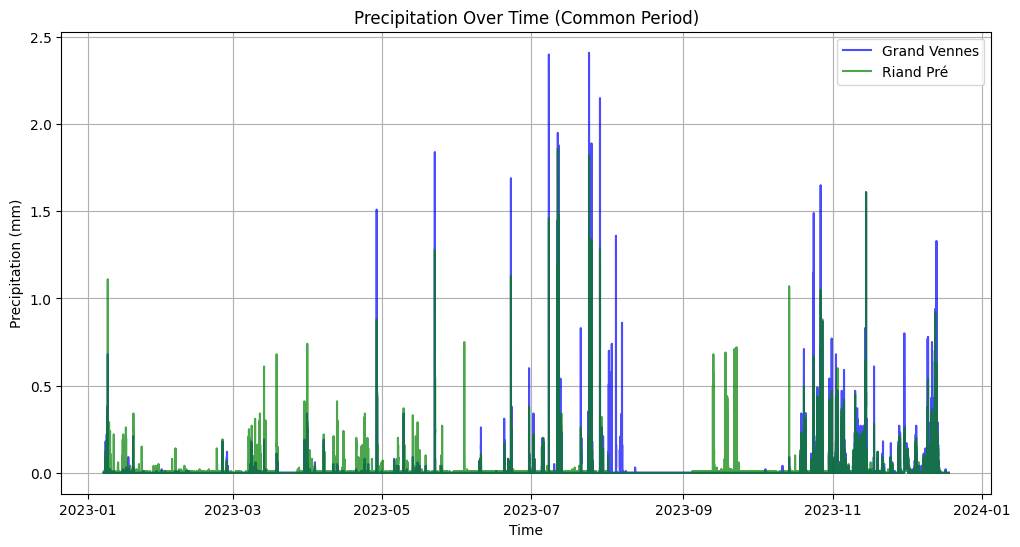

In [17]:
#Finding the common time period between the two datasets
start_time = max(grandvennes.index.min(), riandpre.index.min())
end_time = min(grandvennes.index.max(), riandpre.index.max())

# Filtering both datasets to the common time period
grandvennes_filtered = grandvennes.loc[start_time:end_time]
riandpre_filtered = riandpre.loc[start_time:end_time]

# Converting precipitation from drops to mm (assuming 1 drop = 0.01 mm)
grandvennes_filtered['Precipitation_mm'] = grandvennes_filtered['Precipitation'] * 0.01
riandpre_filtered['Precipitation_mm'] = riandpre_filtered['Precipitation'] * 0.01

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(grandvennes_filtered.index, grandvennes_filtered['Precipitation_mm'], label='Grand Vennes', color='blue', alpha=0.7)
plt.plot(riandpre_filtered.index, riandpre_filtered['Precipitation_mm'], label='Riand Pré', color='green', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time (Common Period)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [18]:
# Round down the DateTime to the previous minute (removes seconds, truncating)
grandvennes.index = grandvennes.index.floor('T')  # 'T' means truncating to the minute
riandpre.index = riandpre.index.floor('T')

# Resample both datasets to ensure they have data every 3 minutes (if necessary)
# Resampling to the closest 3-minute interval and filling missing values with NaN
grandvennes_resampled = grandvennes.resample('3T').mean()  # '3T' stands for 3-minute intervals
riandpre_resampled = riandpre.resample('3T').mean()

# Now, align both datasets to the common time period (intersection of their timestamps)
start_time = max(grandvennes_resampled.index.min(), riandpre_resampled.index.min())
end_time = min(grandvennes_resampled.index.max(), riandpre_resampled.index.max())

grandvennes_aligned = grandvennes_resampled.loc[start_time:end_time]
riandpre_aligned = riandpre_resampled.loc[start_time:end_time]

# Drop rows with missing values (if any) from both datasets
grandvennes_aligned = grandvennes_aligned.dropna()
riandpre_aligned = riandpre_aligned.dropna()

# Now both datasets are aligned and cleaned, and you can proceed with further analysis
# Example: viewing the cleaned and aligned data
print("Aligned and cleaned Grandvennes data:")
print(grandvennes_aligned.head())

print("Aligned and cleaned Riandpre data:")
print(riandpre_aligned.head())


Aligned and cleaned Grandvennes data:
                     Index  Precipitation
DateTime                                 
2023-01-07 08:27:00    1.0            0.0
2023-01-07 08:30:00    2.0            0.0
2023-01-07 08:33:00    3.0            0.0
2023-01-07 08:36:00    4.0            0.0
2023-01-07 08:39:00    5.0            0.0
Aligned and cleaned Riandpre data:
                       Index  Precipitation
DateTime                                   
2023-01-07 08:27:00  28489.0            0.0
2023-01-07 08:30:00  28490.0            0.0
2023-01-07 08:33:00  28491.0            0.0
2023-01-07 08:36:00  28492.0            0.0
2023-01-07 08:39:00  28493.0            0.0


<ipython-input-18-9fcbbdb8c266>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  grandvennes.index = grandvennes.index.floor('T')  # 'T' means truncating to the minute
<ipython-input-18-9fcbbdb8c266>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  riandpre.index = riandpre.index.floor('T')
<ipython-input-18-9fcbbdb8c266>:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  grandvennes_resampled = grandvennes.resample('3T').mean()  # '3T' stands for 3-minute intervals
<ipython-input-18-9fcbbdb8c266>:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  riandpre_resampled = riandpre.resample('3T').mean()


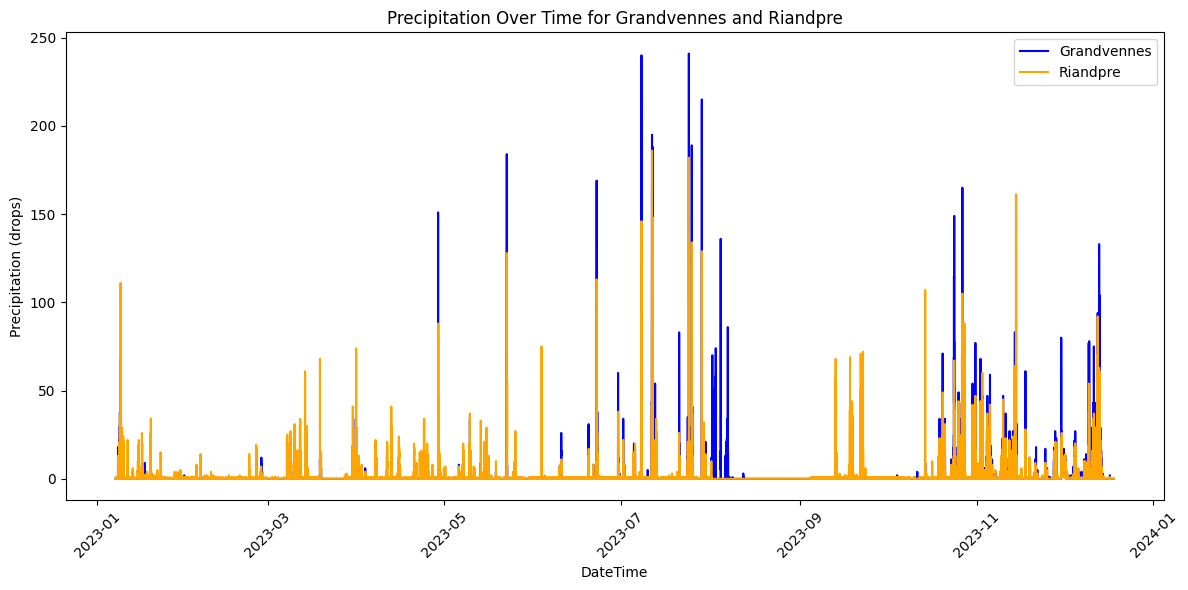

In [20]:
# Plotting the data for both stations
plt.figure(figsize=(12, 6))

# Plot Grandvennes data
plt.plot(grandvennes_aligned.index, grandvennes_aligned['Precipitation'], label='Grandvennes', color='blue')

# Plot Riandpre data
plt.plot(riandpre_aligned.index, riandpre_aligned['Precipitation'], label='Riandpre', color='orange')

# Add labels and title
plt.xlabel('DateTime')
plt.ylabel('Precipitation (drops)')
plt.title('Precipitation Over Time for Grandvennes and Riandpre')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
# Merge the datasets on the 'DateTime' index (this aligns both datasets based on time)
combined_data = pd.merge(grandvennes_aligned[['Precipitation']],
                         riandpre_aligned[['Precipitation']],
                         left_index=True, right_index=True,
                         suffixes=('_Grandvennes', '_Riandpre'))

# Display the first few rows of the combined data
print("Combined Precipitation Data:")
print(combined_data.head())

Combined Precipitation Data:
                     Precipitation_Grandvennes  Precipitation_Riandpre
DateTime                                                              
2023-01-07 08:27:00                        0.0                     0.0
2023-01-07 08:30:00                        0.0                     0.0
2023-01-07 08:33:00                        0.0                     0.0
2023-01-07 08:36:00                        0.0                     0.0
2023-01-07 08:39:00                        0.0                     0.0


# Splitting dataset

In [23]:
# Calculate the index for the splits
train_size = int(0.7 * len(combined_data))  # 70% for training
val_size = int(0.15 * len(combined_data))  # 15% for validation
test_size = len(combined_data) - train_size - val_size  # 15% for testing

# Split the data sequentially
train_data = combined_data[:train_size]
val_data = combined_data[train_size:train_size + val_size]
test_data = combined_data[train_size + val_size:]

# Display the sizes of each dataset
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

# Display the first few rows of each dataset
print("\nTraining Data:")
print(train_data.head())

print("\nValidation Data:")
print(val_data.head())

print("\nTest Data:")
print(test_data.head())


Training set size: 92561
Validation set size: 19834
Test set size: 19836

Training Data:
                     Precipitation_Grandvennes  Precipitation_Riandpre
DateTime                                                              
2023-01-07 08:27:00                        0.0                     0.0
2023-01-07 08:30:00                        0.0                     0.0
2023-01-07 08:33:00                        0.0                     0.0
2023-01-07 08:36:00                        0.0                     0.0
2023-01-07 08:39:00                        0.0                     0.0

Validation Data:
                     Precipitation_Grandvennes  Precipitation_Riandpre
DateTime                                                              
2023-09-26 19:18:00                        0.0                     0.0
2023-09-26 19:21:00                        0.0                     0.0
2023-09-26 19:24:00                        0.0                     0.0
2023-09-26 19:27:00                      

In [27]:
# Extract X and y for each dataset
# For training data
X_train = train_data[['Precipitation_Grandvennes', 'Precipitation_Riandpre']]  # Features (precipitation from both stations)

# For validation data
X_valid = val_data[['Precipitation_Grandvennes', 'Precipitation_Riandpre']]  # Features (precipitation from both stations)

# For test data
X_test = test_data[['Precipitation_Grandvennes', 'Precipitation_Riandpre']]  # Features (precipitation from both stations)

# Display the first few rows of the extracted data
print("X_train:")
print(X_train.head())

print("\nX_valid:")
print(X_valid.head())

print("\nX_test:")
print(X_test.head())

X_train:
                     Precipitation_Grandvennes  Precipitation_Riandpre
DateTime                                                              
2023-01-07 08:27:00                        0.0                     0.0
2023-01-07 08:30:00                        0.0                     0.0
2023-01-07 08:33:00                        0.0                     0.0
2023-01-07 08:36:00                        0.0                     0.0
2023-01-07 08:39:00                        0.0                     0.0

X_valid:
                     Precipitation_Grandvennes  Precipitation_Riandpre
DateTime                                                              
2023-09-26 19:18:00                        0.0                     0.0
2023-09-26 19:21:00                        0.0                     0.0
2023-09-26 19:24:00                        0.0                     0.0
2023-09-26 19:27:00                        0.0                     0.0
2023-09-26 19:30:00                        0.0            

# Number of components

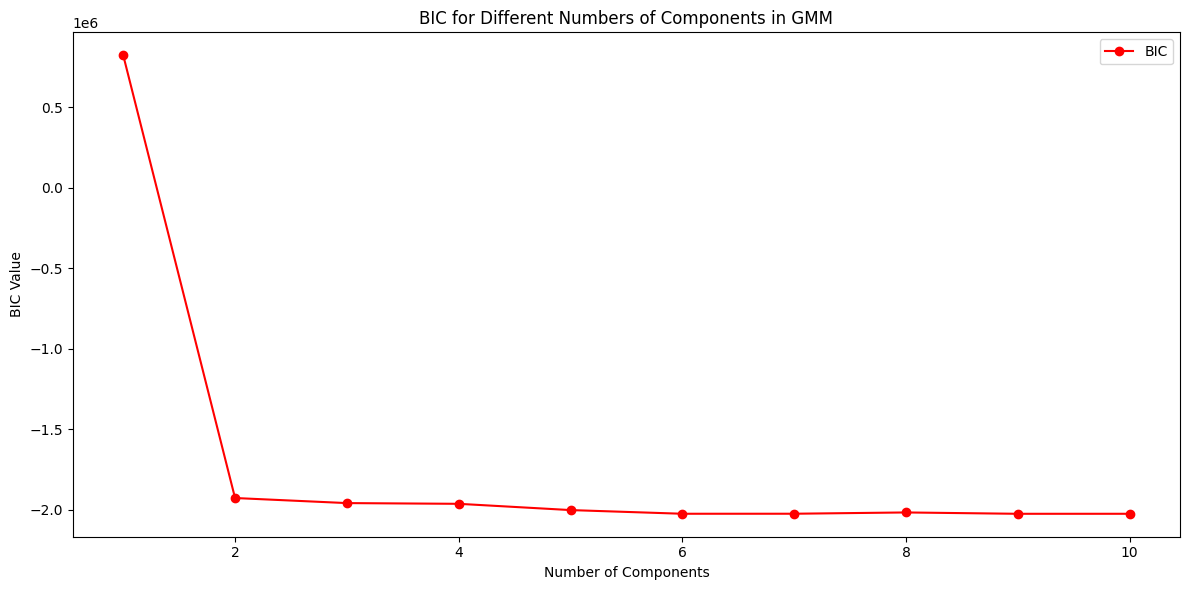

Best number of components (based on BIC): 9


In [28]:
from sklearn.mixture import GaussianMixture

# Define the range of components to try (e.g., 1 to 10 components)
n_components_range = range(1, 11)

# Initialize list to store BIC values
bic_values = []

# Fit Gaussian Mixture Models for each number of components and compute BIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train)  # Fit the GMM model to the training features (X_train)
    bic_values.append(gmm.bic(X_train))  # Store BIC value

# Plot BIC to visualize the optimal number of components
plt.figure(figsize=(12, 6))

plt.plot(n_components_range, bic_values, label='BIC', color='red', marker='o')

# Add labels and title
plt.xlabel('Number of Components')
plt.ylabel('BIC Value')
plt.title('BIC for Different Numbers of Components in GMM')

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the number of components that minimize BIC
best_n_components_bic = n_components_range[np.argmin(bic_values)]

print(f"Best number of components (based on BIC): {best_n_components_bic}")


# Initialization of Gaussian Mixture Model

In [29]:
# Initialize the Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
